In [80]:
#Importing the python packages
import numpy as np
import pandas as pd
from sklearn import metrics
from sklearn.datasets import load_boston
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score
import operator

import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
%matplotlib inline

In [81]:
column_names = ['CRIM', 'ZN', 'INDUS', 'CHAS', 'NOX', 'RM', 'AGE', 'DIS', 'RAD', 'TAX', 'PTRATIO', 'B', 'LSTAT', 'MEDV']

Boston_housing_data = pd.read_csv("housing.csv",header=None, sep="\s+",names=column_names)


In [82]:
Boston_housing_data.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222.0,18.7,396.90,5.33,36.2


In [83]:
print(Boston_housing_data.dtypes)
print(Boston_housing_data.shape)

CRIM       float64
ZN         float64
INDUS      float64
CHAS         int64
NOX        float64
RM         float64
AGE        float64
DIS        float64
RAD          int64
TAX        float64
PTRATIO    float64
B          float64
LSTAT      float64
MEDV       float64
dtype: object
(506, 14)


In [84]:
prices = Boston_housing_data['MEDV']
features = Boston_housing_data.drop('MEDV', axis = 1)

In [85]:
Boston_housing_data.nunique()

CRIM       504
ZN          26
INDUS       76
CHAS         2
NOX         81
RM         446
AGE        356
DIS        412
RAD          9
TAX         66
PTRATIO     46
B          357
LSTAT      455
MEDV       229
dtype: int64

In [86]:
Boston_housing_data.isnull().sum()

CRIM       0
ZN         0
INDUS      0
CHAS       0
NOX        0
RM         0
AGE        0
DIS        0
RAD        0
TAX        0
PTRATIO    0
B          0
LSTAT      0
MEDV       0
dtype: int64

In [87]:
Boston_housing_data[Boston_housing_data.isnull().any(axis=1)]

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV


In [88]:
Boston_housing_data.describe()
#Boston_housing_data.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
count,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000
mean,3.613524,11.363636,11.136779,0.069170,0.554695,6.284634,68.574901,3.795043,9.549407,408.237154,18.455534,356.674032,12.653063,22.532806
std,8.601545,23.322453,6.860353,0.253994,0.115878,0.702617,28.148861,2.105710,8.707259,168.537116,2.164946,91.294864,7.141062,9.197104
min,0.006320,0.000000,0.460000,0.000000,0.385000,3.561000,2.900000,1.129600,1.000000,187.000000,12.600000,0.320000,1.730000,5.000000
25%,0.082045,0.000000,5.190000,0.000000,0.449000,5.885500,45.025000,2.100175,4.000000,279.000000,17.400000,375.377500,6.950000,17.025000
50%,0.256510,0.000000,9.690000,0.000000,0.538000,6.208500,77.500000,3.207450,5.000000,330.000000,19.050000,391.440000,11.360000,21.200000
75%,3.677082,12.500000,18.100000,0.000000,0.624000,6.623500,94.075000,5.188425,24.000000,666.000000,20.200000,396.225000,16.955000,25.000000
max,88.976200,100.000000,27.740000,1.000000,0.871000,8.780000,100.000000,12.126500,24.000000,711.000000,22.000000,396.900000,37.970000,50.000000


In [89]:
# Finding out the correlation between the features
corr = Boston_housing_data.corr()
corr.shape

(14, 14)

<H3>Finding Feature variable useful for prediction

<AxesSubplot:>

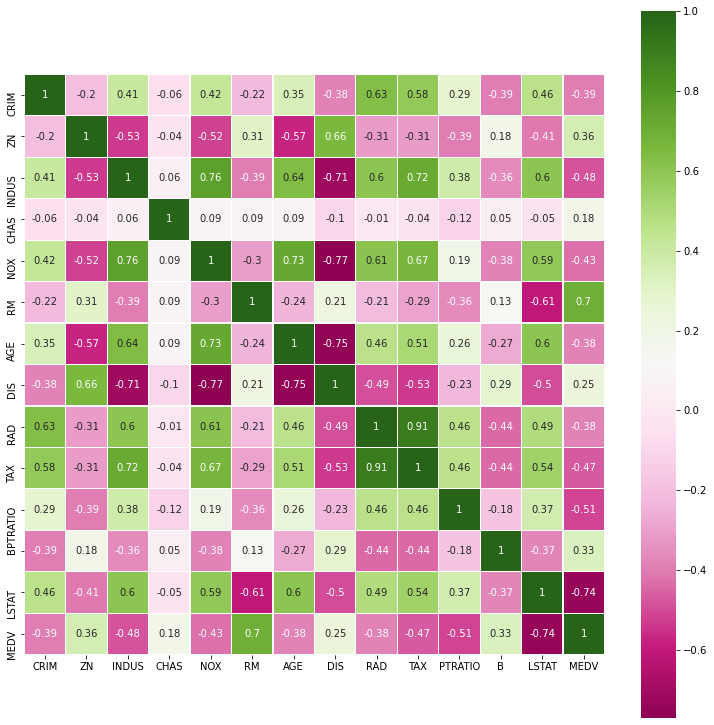

In [90]:
plt.figure(figsize=(13,13))
sns.heatmap(data = Boston_housing_data.corr().round(2),annot=True,cmap='PiYG',linewidths=0.2,square=True)

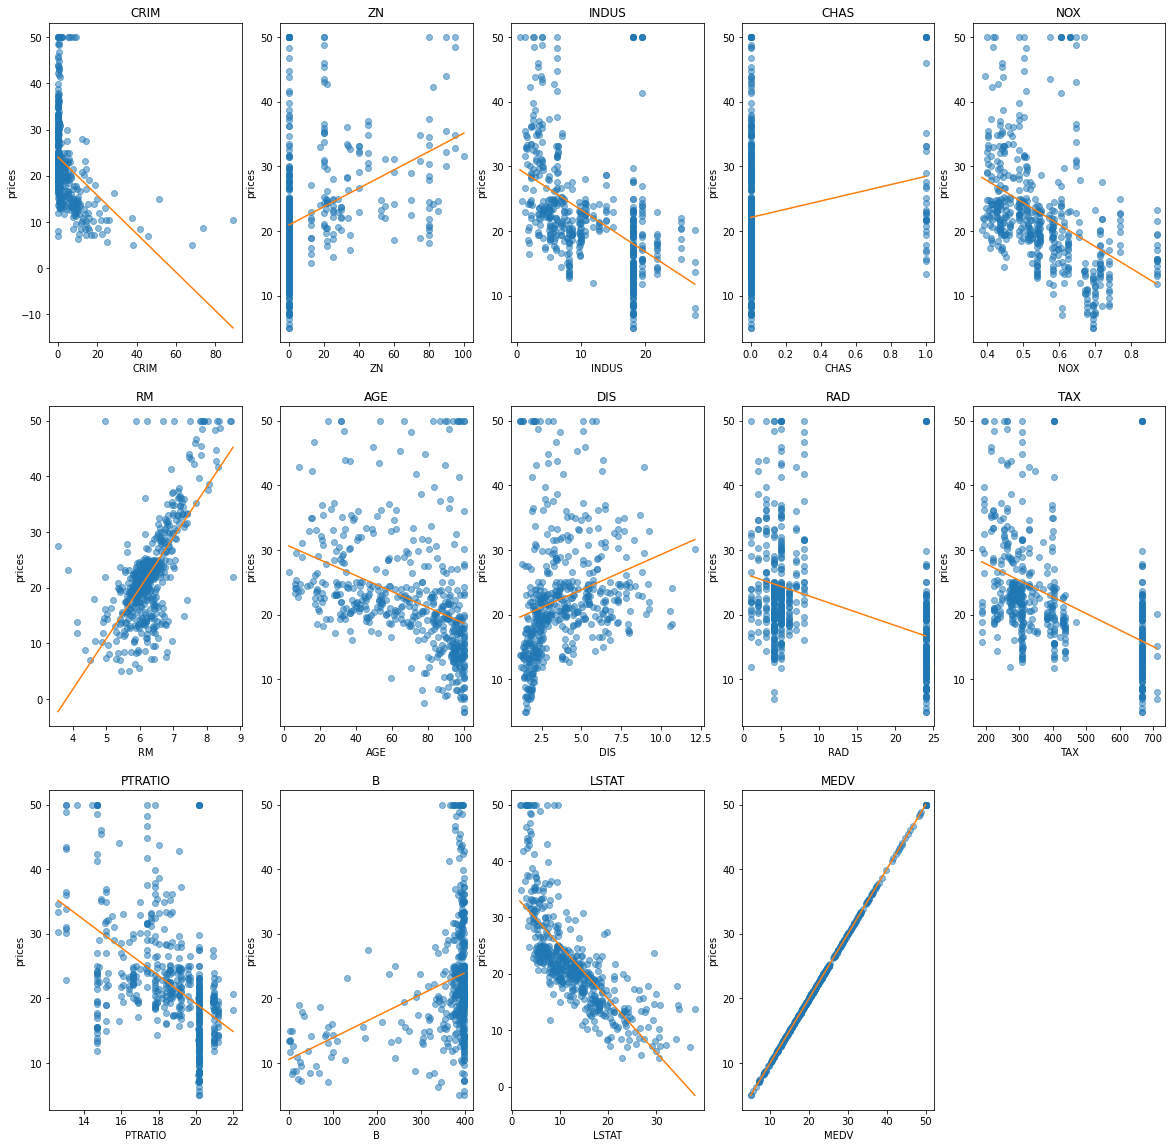

In [91]:
plt.figure(figsize=(20,20))
for i, col in enumerate(Boston_housing_data.columns):
    # 3 plots here hence 1, 3
    plt.subplot(3, 5, i+1)
    x = Boston_housing_data[col]
    y = prices
    plt.plot(x, y,'o',alpha = 0.5)
    # Create regression line
    plt.plot(np.unique(x), np.poly1d(np.polyfit(x, y, 1))(np.unique(x)))
    plt.title(col)
    plt.xlabel(col)
    plt.ylabel('prices')


In [92]:
#Target variable and independent variable split
Boston_housing_data.keys()

X= Boston_housing_data.drop(['MEDV'],axis=1)

y= Boston_housing_data['MEDV']

In [93]:
#Train-test-split
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.4,random_state=4)

<H3>Linear regression

In [94]:
# Creating a Linear regressor
lm = LinearRegression()

#Fitting the model with the training data
lm.fit(X_train,y_train)

LinearRegression()

In [95]:
#Value of y intercept
lm.intercept_

31.15180517531357

<h4>Evaluating the model

In [96]:
# Model prediction on train data
y_pred = lm.predict(X_test)

In [97]:
#Calculating R^2,Root mean squared error(RMSE)

print("R^2:",r2_score(y_test,y_pred))
print('RMSE:',np.sqrt(mse(y_test, y_pred)))

R^2: 0.73061106821216
RMSE: 5.437109330281468


<h2>II - Polynomial Regression

In [98]:
#Storing the dataframe features in X and Y
X = Boston_housing_data["LSTAT"]
Y = Boston_housing_data["MEDV"]

In [99]:
# A look at X
X.head()

0    4.98
1    9.14
2    4.03
3    2.94
4    5.33
Name: LSTAT, dtype: float64

In [106]:
#Train test split
x_train, x_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 3)

x_train_df = pd.DataFrame(x_train)
x_test_df = pd.DataFrame(x_test)

polynomial_regr = PolynomialFeatures(2)

x_train_poly= polynomial_regr.fit_transform(x_train_df)
x_test_poly= polynomial_regr.fit_transform(x_test_df)

# Creating a Linear regressor for Polynomial features
polynomial_model = LinearRegression()
polynomial_model.fit(x_train_poly,y_train)

y_pred_poly = polynomial_model.predict(x_test_poly)


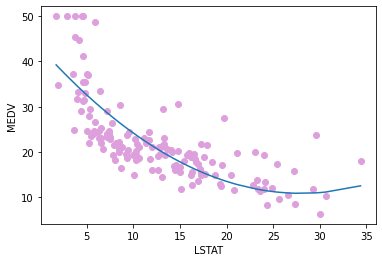

Polynomial Regression: Root Mean squared error:5.648795896238098
Polynomial Regression: R2 Score using Linear Regression:0.5942948908495731


In [107]:
plt.scatter(x_test, y_test, color='plum')
axis = operator.itemgetter(0)

sortzip = sorted(zip(x_test, y_pred_poly), key = axis)

X_test2, Y_pred2 = zip(*sortzip)

plt.plot(X_test2, Y_pred2)
plt.xlabel('LSTAT')
plt.ylabel('MEDV')
plt.show()
print(f"Polynomial Regression: Root Mean squared error:{mean_squared_error(y_test,y_pred_poly,squared=False)}")
print(f"Polynomial Regression: R2 Score using Linear Regression:{r2_score(y_test,y_pred_poly)}")

<H2> For Polynomial Regression Degree =20

In [102]:
#Assigning Degree of Polynomial Features
polynomial_regr = PolynomialFeatures(20)

x_train_poly= polynomial_regr.fit_transform(x_train_df)
x_test_poly= polynomial_regr.fit_transform(x_test_df)

polynomial_model = LinearRegression()
polynomial_model.fit(x_train_poly,y_train)

y_pred_poly = polynomial_model.predict(x_test_poly)


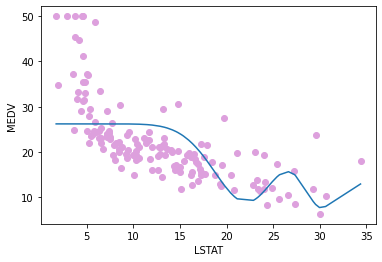

Polynomial Regression: Root Mean squared error:7.670072715432419
Polynomial Regression: R2 Score using Linear Regression:0.2520067590661782


In [103]:
plt.scatter(x_test, y_test, color='plum')
axis = operator.itemgetter(0)

sortzip = sorted(zip(x_test, y_pred_poly), key = axis)

X_test2, Y_pred2 = zip(*sortzip)

plt.plot(X_test2, Y_pred2)
plt.xlabel('LSTAT')
plt.ylabel('MEDV')
plt.show()
print(f"Polynomial Regression: Root Mean squared error:{mean_squared_error(y_test,y_pred_poly,squared=False)}")
print(f"Polynomial Regression: R2 Score using Linear Regression:{r2_score(y_test,y_pred_poly)}")

<H2>III - Multiple Regression

In [104]:
#Storing the dataframe features in X and Y
X_multi_reg = Boston_housing_data[['LSTAT','RM','PTRATIO']]
y_multi_reg = Boston_housing_data['MEDV']

#Train test split
x_train, x_test, y_train, y_test = train_test_split(X_multi_reg, y_multi_reg, test_size = 0.3, random_state = 3)

# Creating a Linear regressor for Multi Regression
multi_regr = LinearRegression()
multi_regr.fit(x_train,y_train)

y_pred = multi_regr.predict(x_test)

print(f"Multiple Regression: Root Mean squared error: {mean_squared_error(y_test,y_pred,squared=False)}")
print(f"Multiple Regression: R2 Score using Linear Regression: {r2_score(y_test,y_pred)}")
print(f"Multiple Regression: Adjusted R2 Score using Linear Regression: {1-(1-r2_score(y_test,y_pred))*(len(x_test)-1)/(len(x_test)-len(x_test.values[0])-1)}")


Multiple Regression: Root Mean squared error: 5.069760499299936
Multiple Regression: R2 Score using Linear Regression: 0.6732063586569188
Multiple Regression: Adjusted R2 Score using Linear Regression: 0.6665821632242888
